## Final Project Submission


Please fill out:
* Student name: Leshmi Jayakumar
* Student pace: Part time 
* Scheduled project review date/time: 12/02/2023
* Instructor name: Hardik Idnani



# KING COUNTRY HOUSE DATA ANALYSIS

#### **Column Names and descriptions for Kings County Data Set


* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### Goal
The goal of this project is to create a relatively accurate prediction model for the prices that future houses sell for. We will explore how different factors affect the pricing the homes, given the data, and compile the most important features into a compatible regression model.

The final result will be a flexible prediciton model(s) that allow for easy prediction of future price sales given certain criteria!

In [2]:
# First, let's import the libraries we are going to use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Ignores warnings
import warnings
warnings.filterwarnings('ignore')

# Used for working with the z-score 
from scipy import stats
from scipy import interpolate
from itertools import combinations
#For OLS model
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import pylab

# Used for Linear Regression model and Cross Validation model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Used when showing normalization of data 
from statsmodels.stats.diagnostic import normal_ad

# Used when creating bar plots and using median instead of mean
from numpy import median

In [3]:
#Let's import our King's County housing data and take a look
data_k=pd.read_csv('data/kc_house_data.csv')

In [4]:
data_k.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
#Data information
data_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
#Convert date to date time
data_k['date'] =  pd.to_datetime(data_k['date'], format='%m/%d/%Y')
#Convert sqft_basement to float
data_k['sqft_basement'] = pd.to_numeric(data_k['sqft_basement'], errors="coerce")
#using errors='coerce' because sqft_basement contains '?' string values. These  values will be converted to NaN.

In [7]:
#after converting the dtype of sqft_basement and Date
data_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [8]:
# Handle the missing data.

print(data_k.isnull().sum())
print(data_k.shape)

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64
(21597, 21)


In [9]:
#For sqft_basement, waterfront and view, replace missing values with 0
data_k['sqft_basement'].fillna(0, inplace=True)
data_k['waterfront'].fillna(0, inplace=True)
data_k['view'].fillna(0, inplace=True)
#For yr_renovated, set yr_renovated to yr_built
data_k['yr_renovated'].fillna(data_k[data_k['yr_renovated'].isna()]['yr_built'], inplace=True)

In [10]:
print(data_k.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


## Initial Hypothesis

#### Will the price of the house positvely correlated with :

* a)No:of bedrooms
* b)Sqft_living
* c)Condition
* d)Grade
* e)Zipcode



# Baseline

In [11]:
#Let's describe our data now that all our values have been cleaned up.
data_k.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,419.300319,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,807.687934,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Looking at the information above we can see the following: 
1) Our target variable, Price, has a mean value of roughly 540K. The lowest price is 78K and the highest price is over 7 million. We can also see that 50% of our data falls below the 500K price. 
2) We can also see some outliers such as a home with 33 bedrooms and 8 bathrooms.
3) We also notice that some of our data is categorical, such as zipcode and waterfront.

Now, let's run some graphics in order to better look at our data

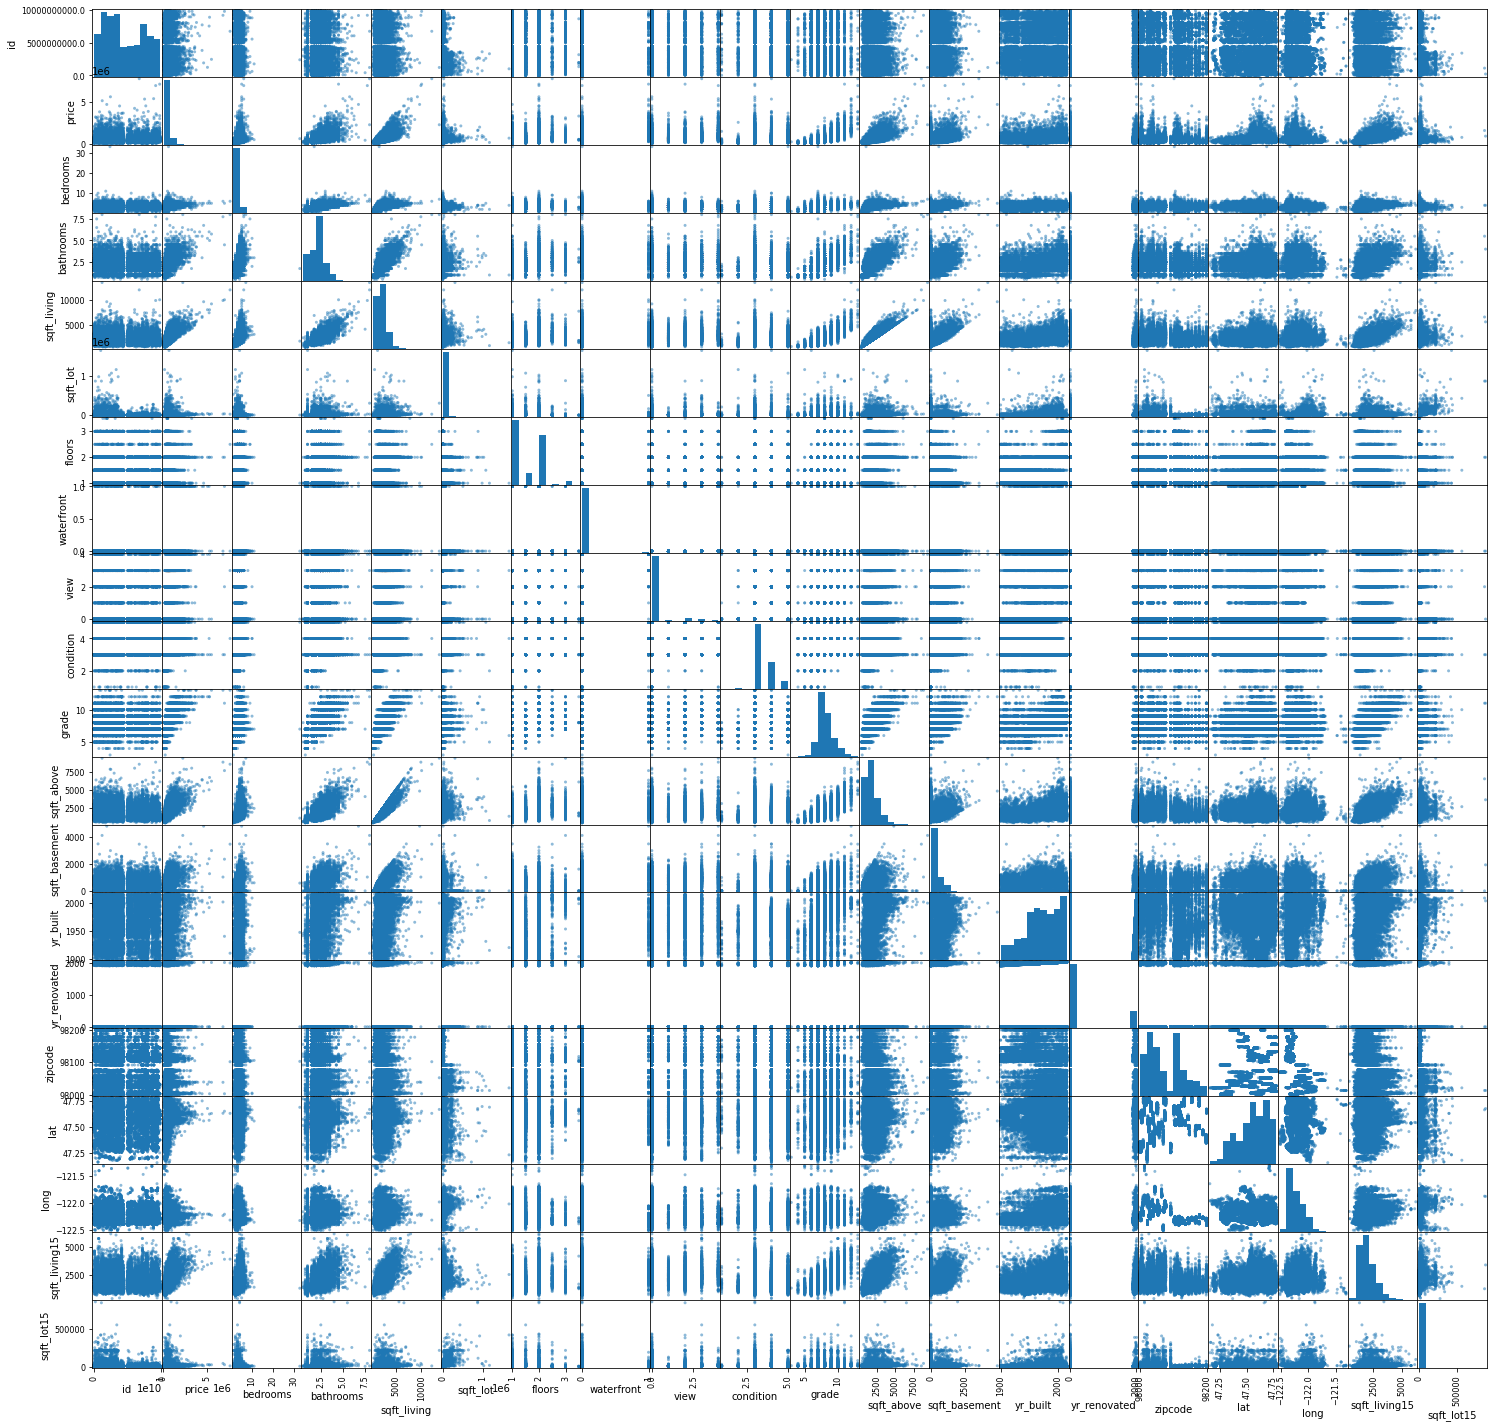

In [585]:
#Scatter plot of the data
pd.plotting.scatter_matrix(data_k, figsize=(25,25));

Looking at our scatter matrix above, we can see interesting relationships in our data, but because the data is difficult to actually look at, we are going to use a heatmap in order to better see the correlation in our data set.

In [12]:
#checking the mean and standard deviation
price_mean = data_k['price'].mean()
price_std = data_k['price'].std()
price_mean, price_std

(540296.5735055795, 367368.1401013945)

In [13]:
#checking the average price of the house according to the year built
avg_price_yr=data_k.groupby(['yr_built']).price.mean()
avg_price_yr.sort_index()

yr_built
1900    581536.632184
1901    557108.344828
1902    673192.592593
1903    480958.195652
1904    583867.755556
            ...      
2011    544648.384615
2012    527436.982353
2013    678599.582090
2014    683792.685152
2015    759970.947368
Name: price, Length: 116, dtype: float64

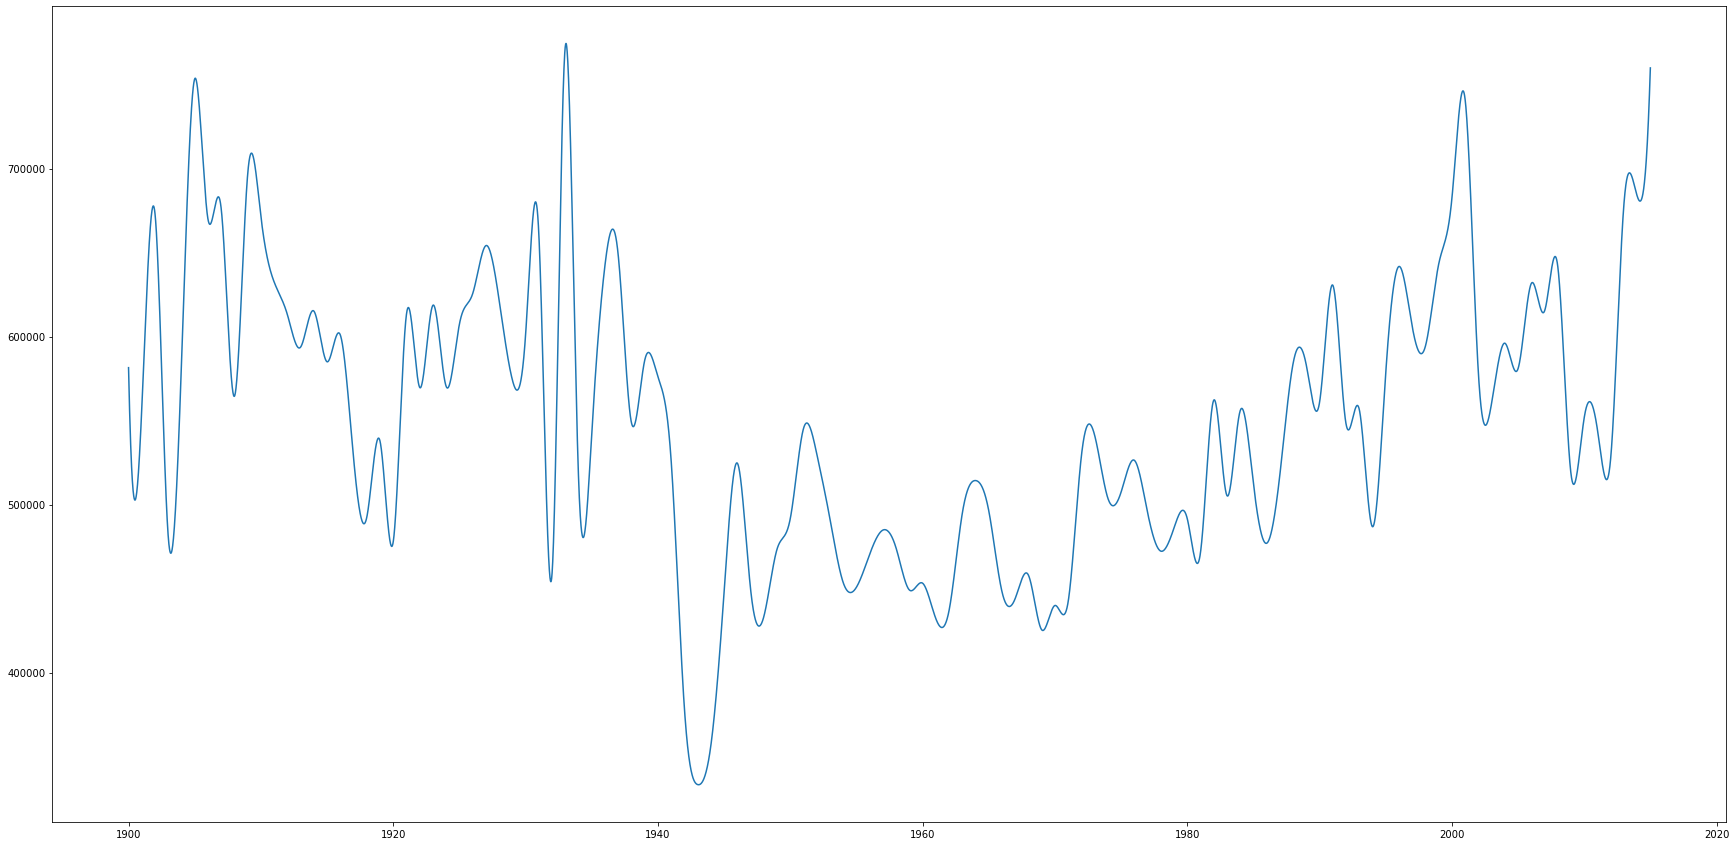

In [14]:
#Data visulisation according to the price and year built
T=avg_price_yr.index
X=np.linspace(T.min(),T.max(),10000)
Y=avg_price_yr.values
spl=interpolate.make_interp_spline(T,Y,3)
test=spl(X)

fig,ax=plt.subplots(figsize=(30,15))
ax.plot(X,test)
# Interpolate to make more smooth(Interpolation in Python is a technique used to estimate unknown data points between two known data points. Interpolation is mostly used to impute missing values in the dataframe or series while preprocessing data.)


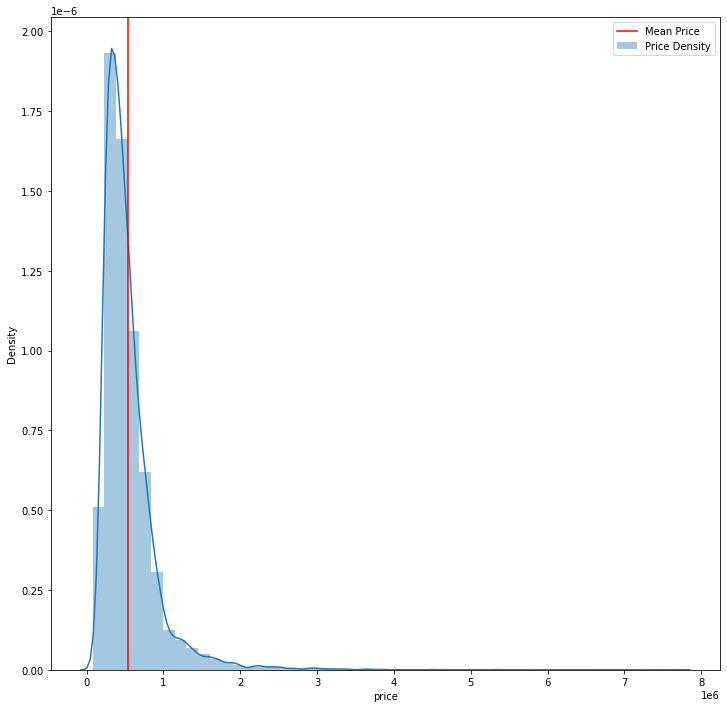

In [15]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.distplot(data_k['price'], label='Price Density')
plt.axvline(price_mean, color='red', label='Mean Price')
plt.legend()

This figure shows that the there no normal distribution with the price and year built

<AxesSubplot:>

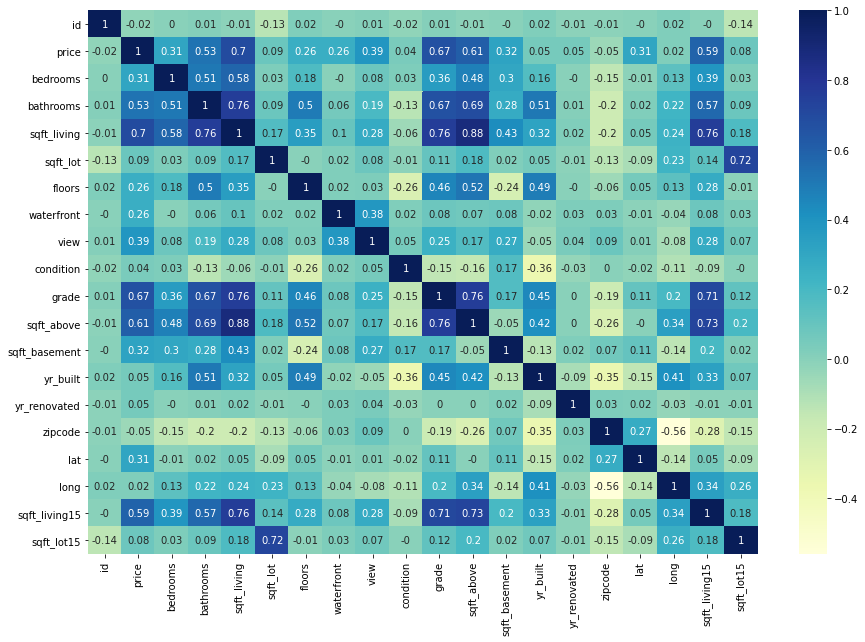

In [16]:
#checking the correlation using data visualization
plt.figure(figsize=(15,10))
sns.heatmap(data_k.corr().round(2),annot=True, cmap=('YlGnBu'))

But, even our heatmap is difficult to read. We are going to use a pairwise correlation in order to determine which values are highly correlated with our target (price) by using any value greater than 0.70.

##### Checking outliers

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

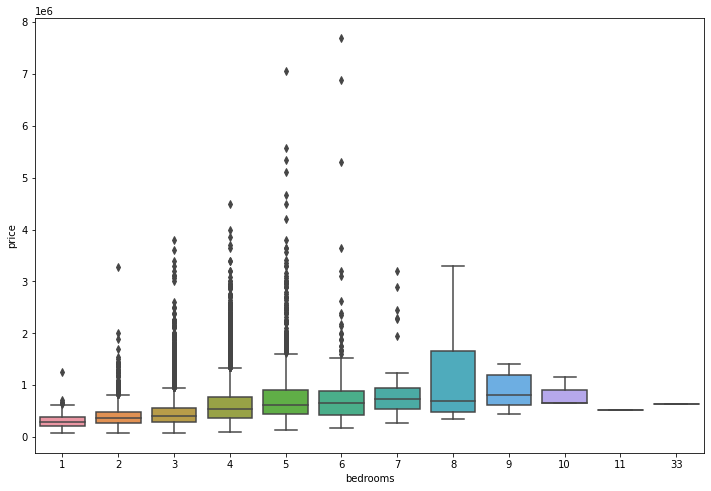

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=data_k)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

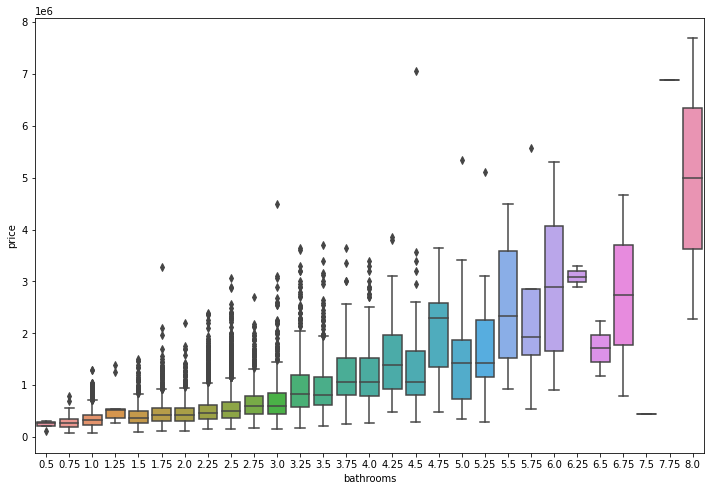

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bathrooms',y='price',data=data_k)

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

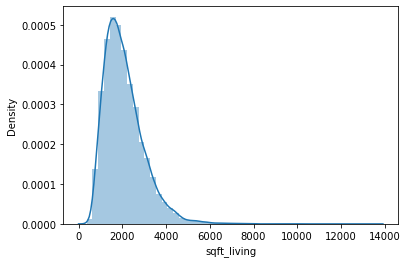

In [19]:
sns.distplot(data_k.sqft_living)

<AxesSubplot:xlabel='floors', ylabel='price'>

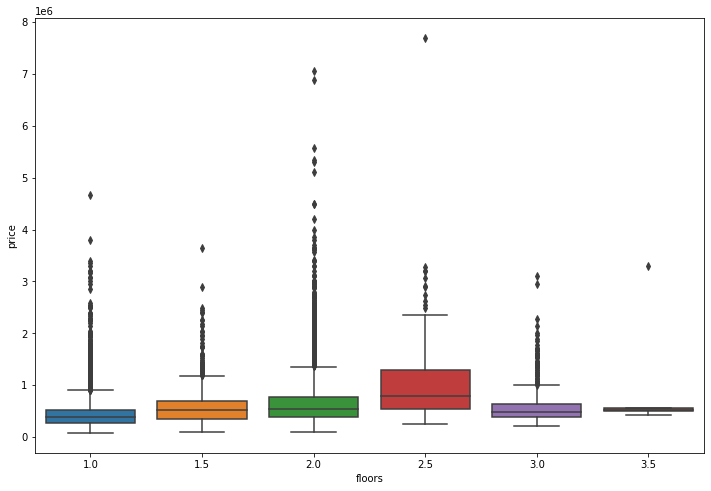

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x='floors',y='price',data=data_k)

Text(0.5, 1.0, 'House Condition and price')

findfont: Font family ['silom'] not found. Falling back to DejaVu Sans.


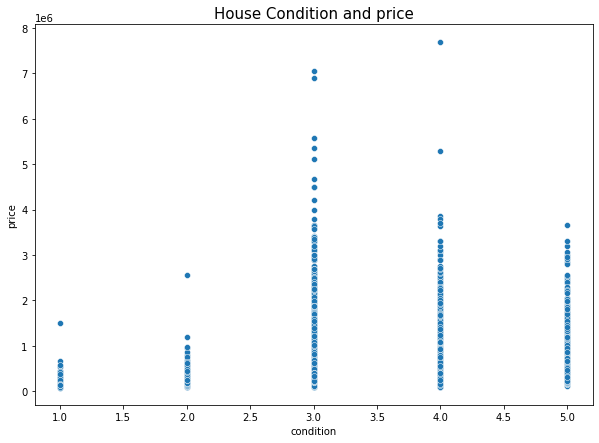

In [21]:
plt.figure(figsize=(10,7))
sns.scatterplot(data_k['condition'], data_k['price'])
plt.title('House Condition and price', fontsize=15, fontname='silom')

Text(0.5, 1.0, 'House Condition and Grade')

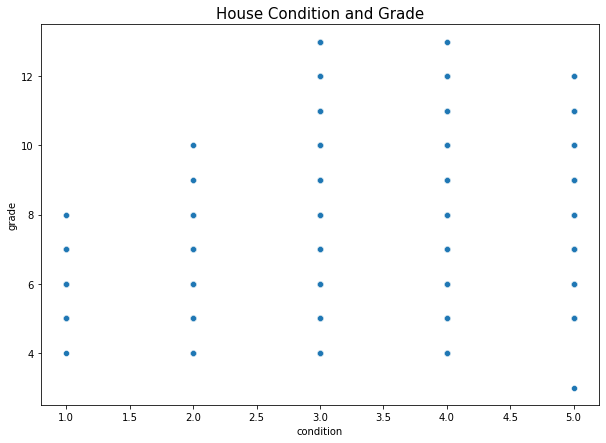

In [22]:
plt.figure(figsize=(10,7))
sns.scatterplot(data_k['condition'], data_k['grade'])
plt.title('House Condition and Grade', fontsize=15, fontname='silom')

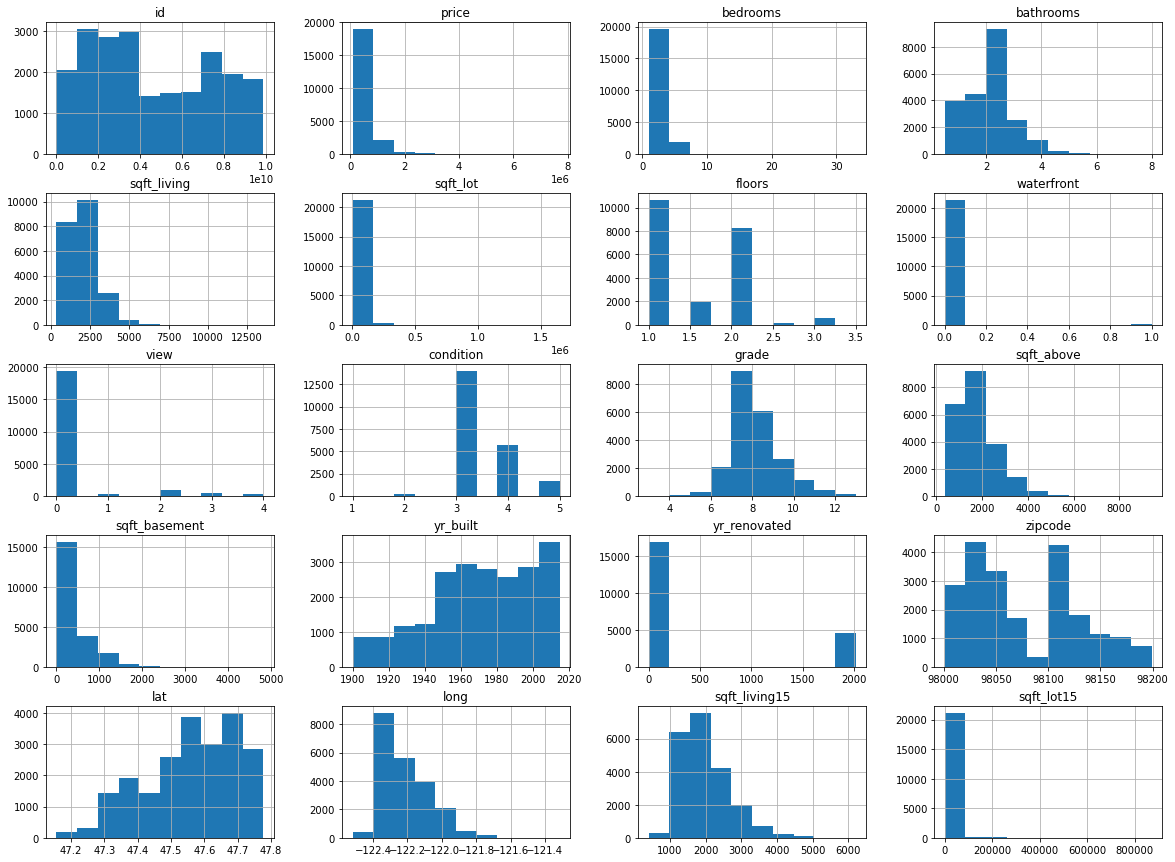

In [23]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
data_k.hist(ax = ax);

We can see from the box plots and histograms above that many of our continuos data have outliers that need to be removed. Let's remove those outliers.

In [24]:
new_data= data_k.drop(['id','view','yr_renovated','date'], axis=1)
new_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,1530,0.0,2009,98103,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2310,0.0,2014,98146,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,1020,0.0,2009,98144,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,1600,0.0,2004,98027,47.5345,-122.069,1410,1287


In [25]:
#Now, let's place our continuous and categorical data into a separate features
cont_data = new_data[['price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built', 'lat', 'long','sqft_living15','sqft_lot15' ]]
cat_data = new_data[['bedrooms','bathrooms','floors','waterfront', 'condition', 'grade', 'zipcode']]

##### Remove outliners

In [26]:
cont_data.shape

(21597, 9)

In [27]:
z_cont=np.abs(stats.zscore(cont_data))

In [28]:
cont_data1 = cont_data[(z_cont < 3).all(axis=1)]

In [29]:
cont_data1.shape

(20176, 9)

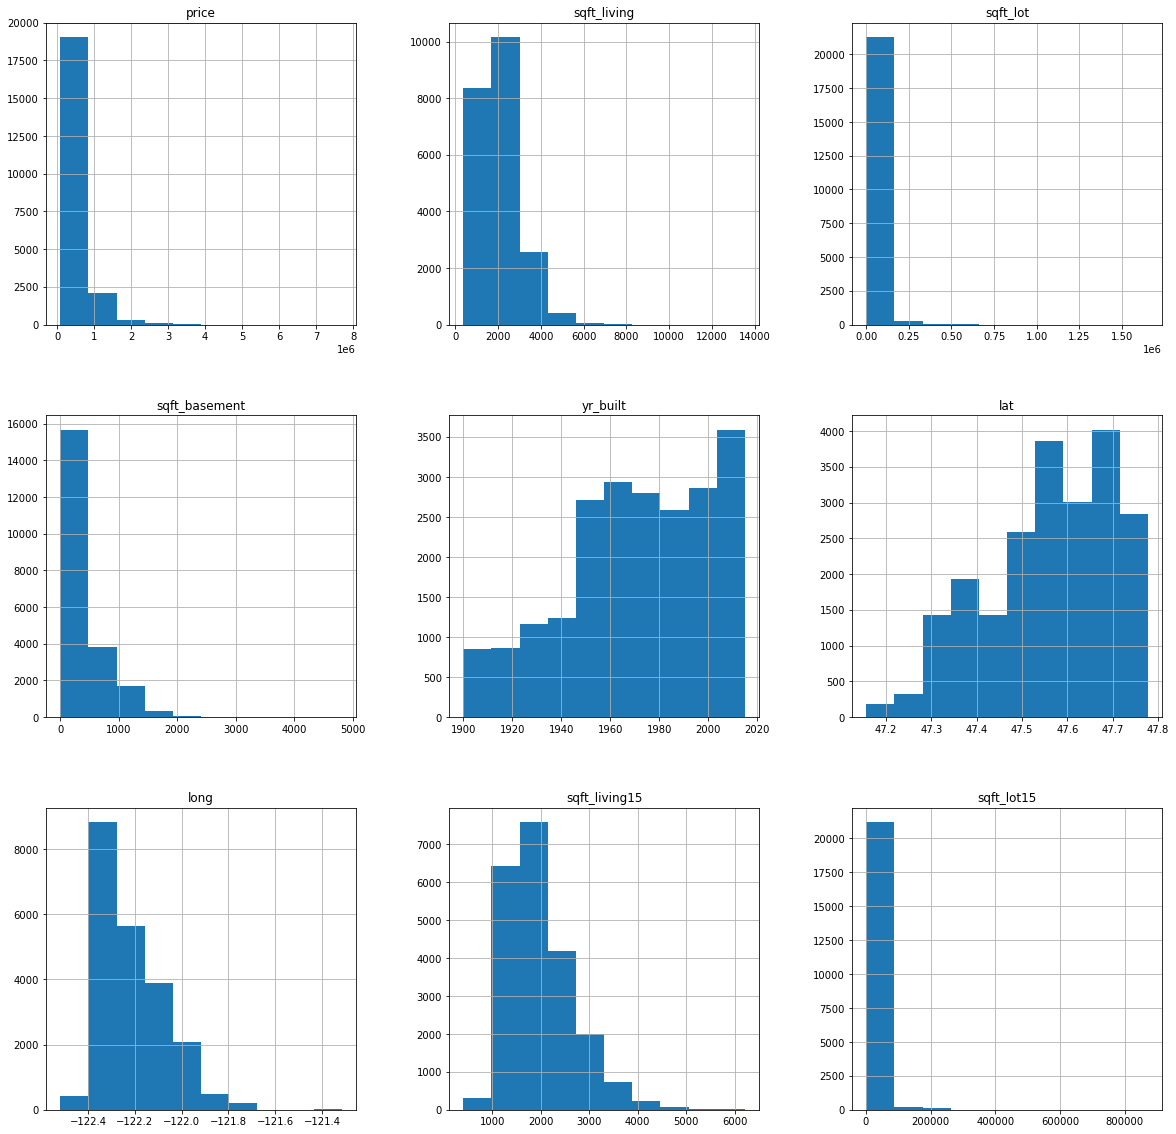

In [30]:
# Analysising data with histogram
cont_data.hist(figsize=(20,20));


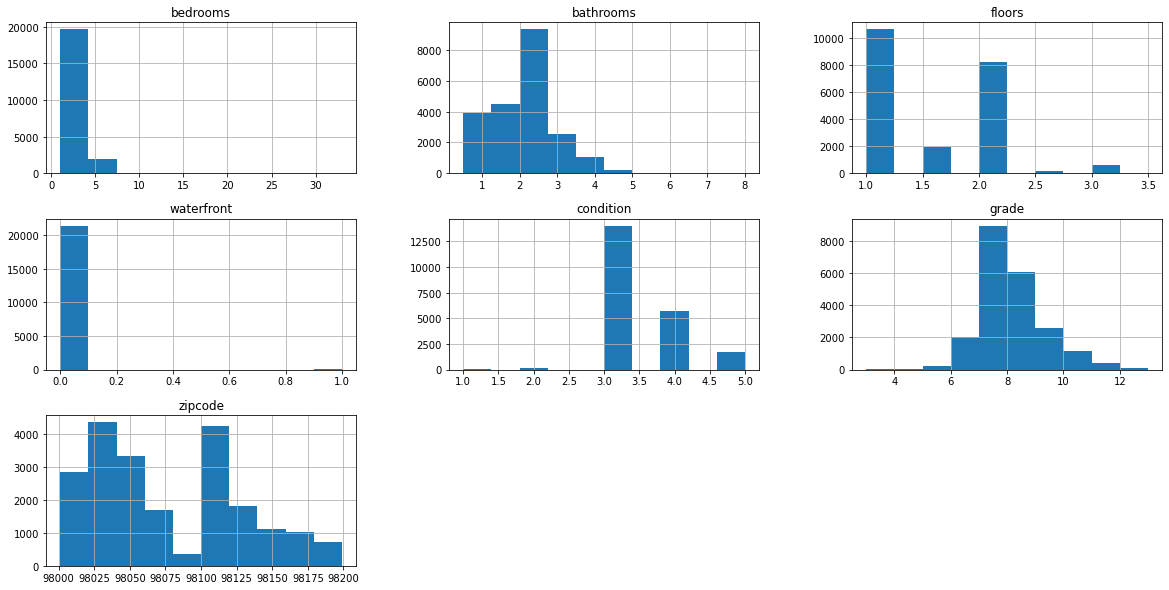

In [31]:
# Analysising data with histogram
cat_data.hist(figsize=(20,10));

In [32]:
#Let's make a continuous data feature and a feature for our target variable
target = cont_data['price']
cont_feat = cont_data.drop('price', axis=1)

In [33]:
cont_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_living    21597 non-null  int64  
 1   sqft_lot       21597 non-null  int64  
 2   sqft_basement  21597 non-null  float64
 3   yr_built       21597 non-null  int64  
 4   lat            21597 non-null  float64
 5   long           21597 non-null  float64
 6   sqft_living15  21597 non-null  int64  
 7   sqft_lot15     21597 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.3 MB


In [34]:
target

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

In [35]:
dummy_1= pd.get_dummies(data=cat_data, columns=['bedrooms'],prefix='bed', drop_first=True)
dummy_2= pd.get_dummies(data=cat_data, columns=['condition'],prefix='condsion', drop_first=True)
dummy_3= pd.get_dummies(data=cat_data, columns=['grade'],prefix='grd', drop_first=True)
dummy_4= pd.get_dummies(data=cat_data, columns=['zipcode'],prefix='zip_c', drop_first=True)


In [36]:
#Let's create one feature containing all of our dummies
cat_dummies = pd.concat([dummy_1,dummy_2,dummy_3,dummy_4,cat_data['waterfront'],cat_data['bathrooms'],cat_data['floors']],axis=1)
cat_dummies

,bathrooms,floors,waterfront,condition,grade,zipcode,bed_2,bed_3,bed_4,bed_5,...,zip_c_98166,zip_c_98168,zip_c_98177,zip_c_98178,zip_c_98188,zip_c_98198,zip_c_98199,waterfront,bathrooms,floors
0,1.00,1.0,0.0,3,7,98178,0,1,0,0,...,0,0,0,1,0,0,0,0.0,1.00,1.0
1,2.25,2.0,0.0,3,7,98125,0,1,0,0,...,0,0,0,0,0,0,0,0.0,2.25,2.0
2,1.00,1.0,0.0,3,6,98028,1,0,0,0,...,0,0,0,0,0,0,0,0.0,1.00,1.0
3,3.00,1.0,0.0,5,7,98136,0,0,1,0,...,0,0,0,0,0,0,0,0.0,3.00,1.0
4,2.00,1.0,0.0,3,8,98074,0,1,0,0,...,0,0,0,0,0,0,0,0.0,2.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2.50,3.0,0.0,3,8,98103,0,1,0,0,...,0,0,0,0,0,0,0,0.0,2.50,3.0
21593,2.50,2.0,0.0,3,8,98146,0,0,1,0,...,0,0,0,0,0,0,0,0.0,2.50,2.0
21594,0.75,2.0,0.0,3,7,98144,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0.75,2.0
21595,2.50,2.0,0.0,3,8,98027,0,1,0,0,...,0,0,0,0,0,0,0,0.0,2.50,2.0


In [37]:
d1= pd.concat([target,cont_feat, cat_dummies], axis=1)

In [38]:
outcome = 'price'
x_cols = d1.drop('price',axis=1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=d1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     967.3
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:01:08   Log-Likelihood:            -2.8855e+05
No. Observations:               21597   AIC:                         5.773e+05
Df Residuals:                   21491   BIC:                         5.782e+05
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9.176e+05   5.86e+06     -0.157      0.876   -1.24e+07    1.06e+07
sqft_living     163.7311      3.010     54.393      0.000     157.831     169.631
sqft_lot          0.2679      0.037      7.274      0.000       0.196       0.340
sqft_basement   -31.2838      3.455     -9.053      0.000     -38.057     -24.511
yr_built       -659.2627     59.962    -10.995      0.000    -776.792    -541.733
lat            1.856e+05   6.08e+04      3.053      0.002    6.65e+04    3.05e+05
long           -2.14e+05   4.37e+04     -4.896      0.000      -3e+05   -1.28e+05
sqft_living15    30.7098      2.751     11.162      0.000      25.317      36.103
sqft_lot15       -0.1419      0.058     -2.446      0.014      -0.256      -0.028
bathrooms[0]   7.097e+06   4.58e+07      0.155      0.877   -8.28e+07     9.7e+07
bathrooms[1]   3.815e+06   2.46e+07      0.155      0.877   -4.45e+07    5.21e+07
bathrooms[2]   -3.73e+07   2.41e+08     -0.155      0.877    -5.1e+08    4.35e+08
bathrooms[3]   1.434e+07   9.27e+07      0.155      0.877   -1.67e+08    1.96e+08
bathrooms[4]   1.207e+07    7.8e+07      0.155      0.877   -1.41e+08    1.65e+08
floors[0]      -1.44e+06   9.28e+06     -0.155      0.877   -1.96e+07    1.67e+07
floors[1]     -7.253e+06   4.69e+07     -0.155      0.877   -9.91e+07    8.46e+07
floors[2]      2.289e+07   1.48e+08      0.155      0.877   -2.67e+08    3.13e+08
floors[3]      -3.95e+06   2.55e+07     -0.155      0.877   -5.39e+07     4.6e+07
floors[4]     -1.027e+07   6.63e+07     -0.155      0.877    -1.4e+08     1.2e+08
waterfront[0] -7.654e+06   5.05e+07     -0.151      0.880   -1.07e+08    9.14e+07
waterfront[1]  1.947e+06   1.15e+07      0.169      0.866   -2.06e+07    2.45e+07
waterfront[2]   8.56e+06   5.43e+07      0.158      0.875   -9.78e+07    1.15e+08
waterfront[3]  8.499e+06   5.39e+07      0.158      0.875   -9.71e+07    1.14e+08
waterfront[4] -1.053e+07   6.91e+07     -0.152      0.879   -1.46e+08    1.25e+08
condition[0]   6.021e+07   3.89e+08      0.155      0.877   -7.03e+08    8.23e+08
condition[1]    3.89e+07   2.51e+08      0.155      0.877   -4.54e+08    5.32e+08
condition[2]  -9.871e+07   6.38e+08     -0.155      0.877   -1.35e+09    1.15e+09
grade[0]      -1.285e+07   8.32e+07     -0.154      0.877   -1.76e+08     1.5e+08
grade[1]       -8.21e+06   5.32e+07     -0.154      0.877   -1.13e+08    9.61e+07
grade[2]       2.132e+07   1.38e+08      0.155      0.877   -2.49e+08    2.91e+08
zipcode[0]    -1.428e+11   9.23e+11     -0.155      0.877   -1.95e+12    1.67e+12
zipcode[1]    -1.132e+11   7.32e+11     -0.155      0.877   -1.55e+12    1.32e+12
zipcode[2]      2.56e+11   1.65e+12      0.155      0.877   -2.99e+12     3.5e+12
bed_2          4069.7844   1.45e+04      0.281      0.779   -2.44e+04    3.25e+04
bed_3          4211.5515   2.15e+04      0.196   

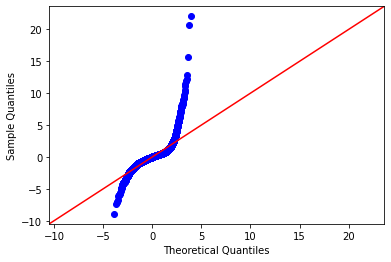

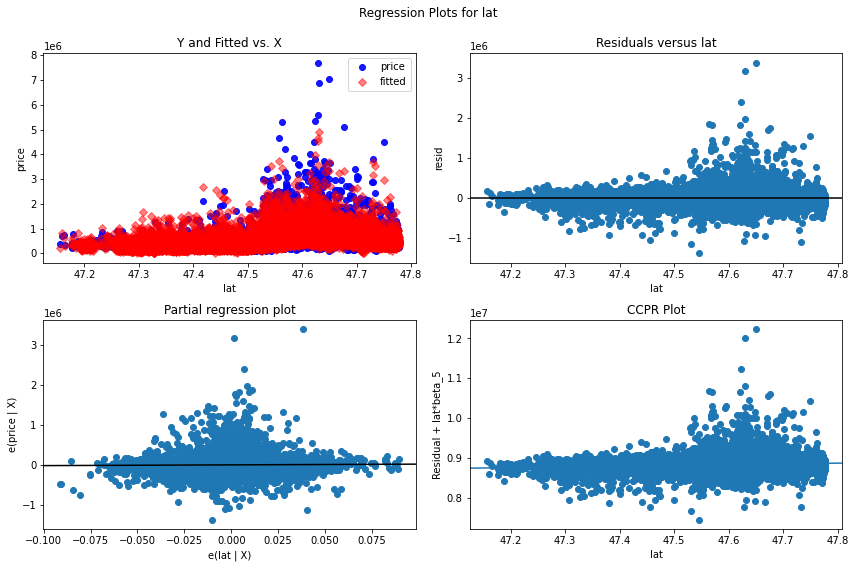

In [39]:
# Q-Q plot and Regression plot
model=smf.ols(formula,data=d1).fit()
fig = sm.graphics.qqplot(model.resid, line='45',fit=True);
#fig.savefig('Basic_model_qqplot')
sm.graphics.plot_regress_exog(model, 'lat', fig=plt.figure(figsize=(12,8)));

# Iteration1

### Log transformation

In [41]:
d2= pd.concat([cont_data,cat_data], axis=1)

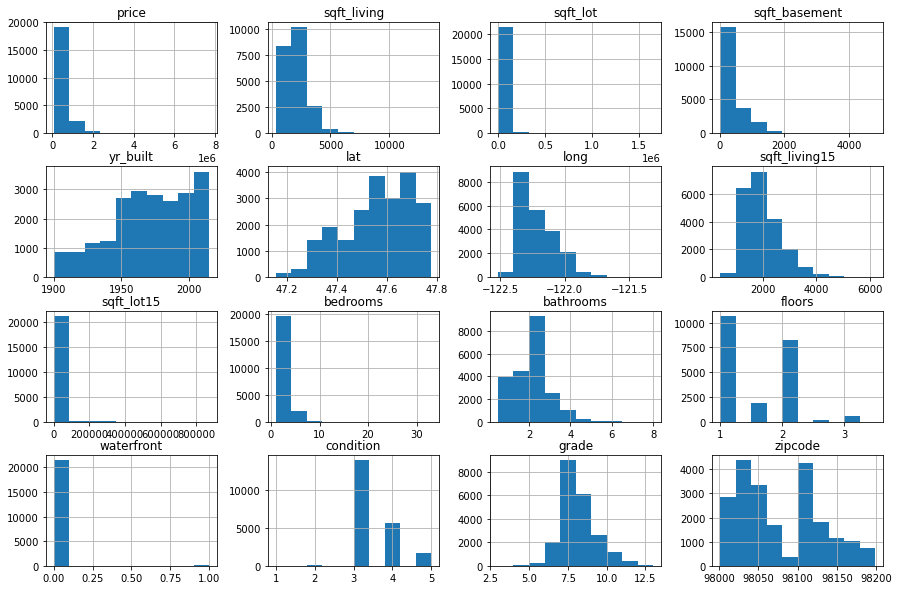

In [44]:
#Checking the data before log transformation
d2_1=d2.hist(figsize  = [15, 10]); 

In [45]:
d2

,price,sqft_living,sqft_lot,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,bedrooms,bathrooms,floors,waterfront,condition,grade,zipcode
0,221900.0,1180,5650,0.0,1955,47.5112,-122.257,1340,5650,3,1.00,1.0,0.0,3,7,98178
1,538000.0,2570,7242,400.0,1951,47.7210,-122.319,1690,7639,3,2.25,2.0,0.0,3,7,98125
2,180000.0,770,10000,0.0,1933,47.7379,-122.233,2720,8062,2,1.00,1.0,0.0,3,6,98028
3,604000.0,1960,5000,910.0,1965,47.5208,-122.393,1360,5000,4,3.00,1.0,0.0,5,7,98136
4,510000.0,1680,8080,0.0,1987,47.6168,-122.045,1800,7503,3,2.00,1.0,0.0,3,8,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,1131,0.0,2009,47.6993,-122.346,1530,1509,3,2.50,3.0,0.0,3,8,98103
21593,400000.0,2310,5813,0.0,2014,47.5107,-122.362,1830,7200,4,2.50,2.0,0.0,3,8,98146
21594,402101.0,1020,1350,0.0,2009,47.5944,-122.299,1020,2007,2,0.75,2.0,0.0,3,7,98144
21595,400000.0,1600,2388,0.0,2004,47.5345,-122.069,1410,1287,3,2.50,2.0,0.0,3,8,98027


In [47]:
logd2= np.log(d2)
logd2

,price,sqft_living,sqft_lot,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,bedrooms,bathrooms,floors,waterfront,condition,grade,zipcode
0,12.309982,7.073270,8.639411,-inf,7.578145,3.860965,NaN,7.200425,8.639411,1.098612,0.000000,0.000000,-inf,1.098612,1.945910,11.494537
1,13.195614,7.851661,8.887653,5.991465,7.576097,3.865372,NaN,7.432484,8.941022,1.098612,0.810930,0.693147,-inf,1.098612,1.945910,11.493997
2,12.100712,6.646391,9.210340,-inf,7.566828,3.865726,NaN,7.908387,8.994917,0.693147,0.000000,0.000000,-inf,1.098612,1.791759,11.493008
3,13.311329,7.580700,8.517193,6.813445,7.583248,3.861168,NaN,7.215240,8.517193,1.386294,1.098612,0.000000,-inf,1.609438,1.945910,11.494110
4,13.142166,7.426549,8.997147,-inf,7.594381,3.863186,NaN,7.495542,8.923058,1.098612,0.693147,0.000000,-inf,1.098612,2.079442,11.493478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,12.793859,7.333023,7.030857,-inf,7.605392,3.864917,NaN,7.333023,7.319202,1.098612,0.916291,1.098612,-inf,1.098612,2.079442,11.493773
21593,12.899220,7.745003,8.667852,-inf,7.607878,3.860955,NaN,7.512071,8.881836,1.386294,0.916291,0.693147,-inf,1.098612,2.079442,11.494211
21594,12.904459,6.927558,7.207860,-inf,7.605392,3.862715,NaN,6.927558,7.604396,0.693147,-0.287682,0.693147,-inf,1.098612,1.945910,11.494191
21595,12.899220,7.377759,7.778211,-inf,7.602900,3.861456,NaN,7.251345,7.160069,1.098612,0.916291,0.693147,-inf,1.098612,2.079442,11.492998


In [48]:
new_d2= logd2.drop(['sqft_basement','long','waterfront'], axis=1)
new_d2

,price,sqft_living,sqft_lot,yr_built,lat,sqft_living15,sqft_lot15,bedrooms,bathrooms,floors,condition,grade,zipcode
0,12.309982,7.073270,8.639411,7.578145,3.860965,7.200425,8.639411,1.098612,0.000000,0.000000,1.098612,1.945910,11.494537
1,13.195614,7.851661,8.887653,7.576097,3.865372,7.432484,8.941022,1.098612,0.810930,0.693147,1.098612,1.945910,11.493997
2,12.100712,6.646391,9.210340,7.566828,3.865726,7.908387,8.994917,0.693147,0.000000,0.000000,1.098612,1.791759,11.493008
3,13.311329,7.580700,8.517193,7.583248,3.861168,7.215240,8.517193,1.386294,1.098612,0.000000,1.609438,1.945910,11.494110
4,13.142166,7.426549,8.997147,7.594381,3.863186,7.495542,8.923058,1.098612,0.693147,0.000000,1.098612,2.079442,11.493478
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,12.793859,7.333023,7.030857,7.605392,3.864917,7.333023,7.319202,1.098612,0.916291,1.098612,1.098612,2.079442,11.493773
21593,12.899220,7.745003,8.667852,7.607878,3.860955,7.512071,8.881836,1.386294,0.916291,0.693147,1.098612,2.079442,11.494211
21594,12.904459,6.927558,7.207860,7.605392,3.862715,6.927558,7.604396,0.693147,-0.287682,0.693147,1.098612,1.945910,11.494191
21595,12.899220,7.377759,7.778211,7.602900,3.861456,7.251345,7.160069,1.098612,0.916291,0.693147,1.098612,2.079442,11.492998


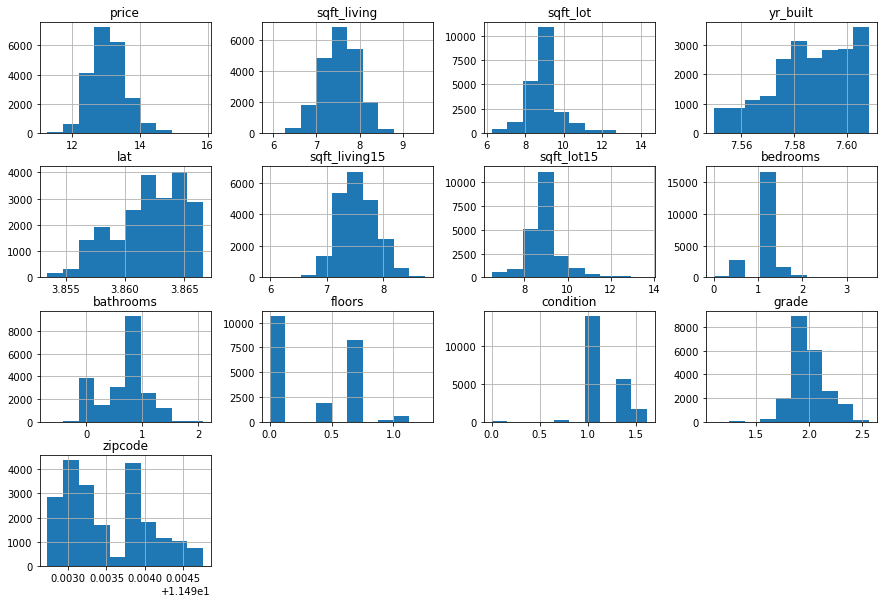

In [51]:

new_d2.hist(figsize  = [15,10 ]);

In [52]:
outcome = 'price'
x_cols = new_d2.drop('price',axis=1)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=new_d2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     5320.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:28:00   Log-Likelihood:                -1936.8
No. Observations:               21597   AIC:                             3900.
Df Residuals:                   21584   BIC:                             4003.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       189.3064     44.214      4.282      0.000     102.644     275.969
sqft_living       0.3963      0.010     39.654      0.000       0.377       0.416
sqft_lot          0.0154      0.005      2.964      0.003       0.005       0.026
yr_built         -8.9186      0.171    -52.111      0.000      -9.254      -8.583
lat              62.7774      0.668     93.976      0.000      61.468      64.087
sqft_living15     0.2439      0.009     26.771      0.000       0.226       0.262
sqft_lot15       -0.0372      0.006     -6.515      0.000      -0.048      -0.026
bedrooms         -0.1553      0.009    -18.024      0.000      -0.172      -0.138
bathrooms         0.1134      0.008     13.674      0.000       0.097       0.130
floors            0.0869      0.007     12.868      0.000       0.074       0.100
condition         0.1968      0.011     18.084      0.000       0.175       0.218
grade             1.3661      0.021     65.682      0.000       1.325       1.407
zipcode         -31.2011      3.849     -8.106      0.000     -38.746     -23.656
==============================================================================
Omnibus:                      881.274   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1570.015
Skew:                           0.334   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                     5.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

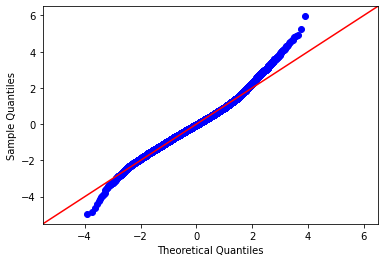

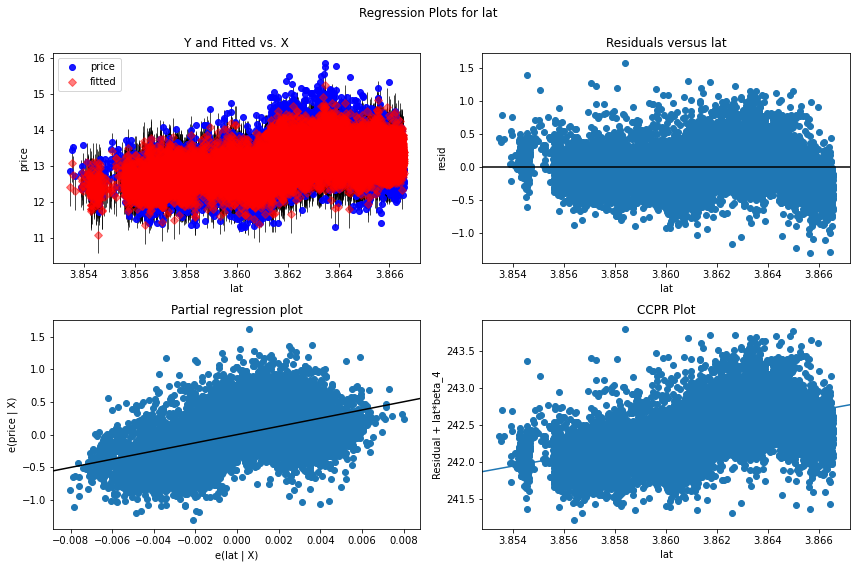

In [54]:
# Q-Q plot and Regression plot
model=smf.ols(formula,data=new_d2).fit()
fig = sm.graphics.qqplot(model.resid, line='45',fit=True);
#fig.savefig('Basic_model_qqplot')
sm.graphics.plot_regress_exog(model, 'lat', fig=plt.figure(figsize=(12,8)));

# Iteration 2

### Train-test split

In [68]:
x=new_d2 
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   sqft_living    21597 non-null  float64
 2   sqft_lot       21597 non-null  float64
 3   yr_built       21597 non-null  float64
 4   lat            21597 non-null  float64
 5   sqft_living15  21597 non-null  float64
 6   sqft_lot15     21597 non-null  float64
 7   bedrooms       21597 non-null  float64
 8   bathrooms      21597 non-null  float64
 9   floors         21597 non-null  float64
 10  condition      21597 non-null  float64
 11  grade          21597 non-null  float64
 12  zipcode        21597 non-null  float64
dtypes: float64(13)
memory usage: 2.1 MB


In [69]:
y = x.drop('price', axis=1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [71]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [72]:
y_predict = lm.predict(X_train)


In [73]:
#model evaluation
print('R^2:',metrics.r2_score(y_train, y_predict))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_predict))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_predict))
print('MSE:',metrics.mean_squared_error(y_train, y_predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_predict)))

R^2: 1.0
Adjusted R^2: 1.0
MAE: 8.177717574614666e-16
MSE: 1.3430120333150587e-30
RMSE: 1.15888396024583e-15


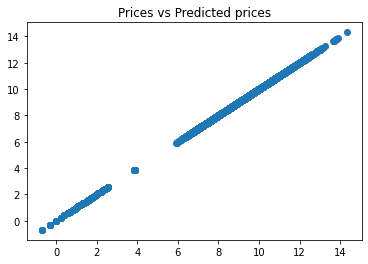

In [74]:
import matplotlib.pyplot as plt

plt.scatter(y_train,y_predict)
plt.title("Prices vs Predicted prices")
plt.show()

In [75]:
#linear regression for ols

y_test_pred=lm.predict(X_test)

acc_linreg=metrics.r2_score(y_test,y_test_pred)
print('R^2:',acc_linreg)
print('Adjusted R^2:', 1- (1-metrics.r2_score(y_test,y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 1.0
Adjusted R^2: 1.0
MAE: 8.119856137683417e-16
MSE: 1.3184415262115913e-30
RMSE: 1.1482340903368055e-15


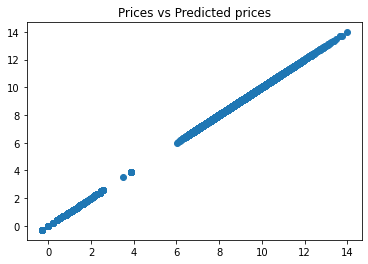

In [76]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_test_pred)
plt.title("Prices vs Predicted prices")
plt.show()

In [77]:
new_d2.corr()

,price,sqft_living,sqft_lot,yr_built,lat,sqft_living15,sqft_lot15,bedrooms,bathrooms,floors,condition,grade,zipcode
price,1.000000,0.674802,0.138261,0.078987,0.449133,0.607154,0.123710,0.342850,0.520278,0.322991,0.043200,0.693837,-0.038757
sqft_living,0.674802,1.000000,0.325983,0.348973,0.038881,0.746836,0.303058,0.648121,0.760764,0.393568,-0.040387,0.744356,-0.222133
sqft_lot,0.138261,0.325983,1.000000,-0.004421,-0.149394,0.363743,0.918665,0.195969,0.084877,-0.211802,0.072511,0.163980,-0.281727
yr_built,0.078987,0.348973,-0.004421,1.000000,-0.148950,0.333426,0.021665,0.194530,0.532918,0.471533,-0.339294,0.462017,-0.348060
lat,0.449133,0.038881,-0.149394,-0.148950,1.000000,0.043663,-0.143761,-0.026777,0.011330,0.038612,-0.017312,0.115787,0.267044
sqft_living15,0.607154,0.746836,0.363743,0.333426,0.043663,1.000000,0.373618,0.425690,0.570469,0.300459,-0.081771,0.681776,-0.290362
sqft_lot15,0.123710,0.303058,0.918665,0.021665,-0.143761,0.373618,1.000000,0.175649,0.079120,-0.203229,0.081134,0.165268,-0.280136
bedrooms,0.342850,0.648121,0.195969,0.194530,-0.026777,0.425690,0.175649,1.000000,0.534008,0.213203,0.033579,0.394210,-0.179881
bathrooms,0.520278,0.760764,0.084877,0.532918,0.011330,0.570469,0.079120,0.534008,1.000000,0.510644,-0.104238,0.656387,-0.227629
floors,0.322991,0.393568,-0.211802,0.471533,0.038612,0.300459,-0.203229,0.213203,0.510644,1.000000,-0.252537,0.472488,-0.071104


<AxesSubplot:>

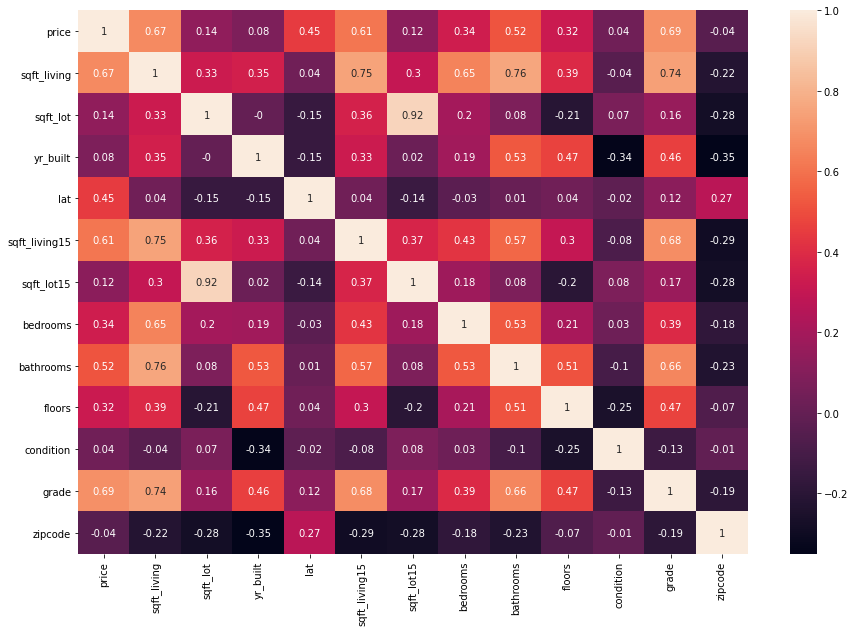

In [83]:
plt.figure(figsize=(15,10))
sns.heatmap(new_d2.corr().round(2),annot=True)